In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import cv2

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17283615392223454056, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9468668717828728048
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8464342770669793602
 physical_device_desc: "device: XLA_GPU device"]

In [3]:
print("version:", tf.__version__)
print("GPU","사용가능" if tf.test.is_gpu_available() else"사용불가능")

version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용불가능


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

In [6]:
#x = cv2.imread('eight_grey2.jpg')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print(data.dtypes)

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object


In [7]:
#Testing my own data
#test_seven = cv2.imread('number1.png')
#test_seven = cv2.cvtColor(test_seven, cv2.COLOR_BGR2GRAY)

test_two = cv2.imread('2.jpg')
test_two = cv2.cvtColor(test_two, cv2.COLOR_BGR2GRAY)
test_two = cv2.bitwise_not(test_two)

test_three = cv2.imread('3.jpg')
test_three = cv2.cvtColor(test_three, cv2.COLOR_BGR2GRAY)
test_three = cv2.bitwise_not(test_three)


test_eight2 = cv2.imread('eight_grey2.jpg')
test_eight2 = cv2.cvtColor(test_eight2, cv2.COLOR_BGR2GRAY)
test_eight2 = cv2.bitwise_not(test_eight2)
test_eight2.shape

(28, 28)

In [8]:
#Resizing my test data
#test_seven_resize = cv2.resize(test_seven, dsize=(28, 28))
test_two_resize = cv2.resize(test_two, dsize=(28, 28))
test_three_resize = cv2.resize(test_three, dsize=(28, 28))



In [9]:
#Reshaping my own data
#test_seven_resize = test_seven_resize.reshape(-1,28,28,1)
test_three_resize = test_three_resize.reshape(-1,28,28,1)
test_two_resize = test_two_resize.reshape(-1,28,28,1)
test_eight2 = test_eight2.reshape(-1,28,28,1)



In [10]:
#training dataset
y = data['label']
x = data.drop(['label'],axis=1)
x_test = data_test.values #Numpy array
type(x_test)

numpy.ndarray

In [11]:
type(x_test)

numpy.ndarray

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
#data scailing
#x_train = x / 255
#x_test = x_test / 255
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#test_seven_resize = test_seven_resize.astype('float32')/255
test_two_resize = test_two_resize.astype('float32')/255
test_three_resize = test_three_resize.astype('float32')/255
test_eight2 = test_eight2.astype('float32')/255
#scale = MinMaxScaler()
#x_train = scale.fit_transform(x)
#x_test = scale.transform(x_test)

In [14]:
#test_resize.shape

In [15]:
#x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [17]:
#Change y categories into binary using one hot encoding
y_train1 = utils.to_categorical(y_train, 10)
y_val1 = utils.to_categorical(y_val, 10)

In [18]:
type(y_val1)

numpy.ndarray

In [19]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [20]:
x_train1 = x_train.values.reshape(-1,28,28,1)
x_val1 = x_val.values.reshape(-1,28,28,1)

In [21]:
x_train1.shape, x_val1.shape, y_train.shape, y_val.shape

((29400, 28, 28, 1), (12600, 28, 28, 1), (29400,), (12600,))

In [22]:
x_test1 = x_test.reshape(-1,28,28,1)
x_test1.shape

(28000, 28, 28, 1)

In [23]:
#x_train__ = x_train1.reshape(x_train1.shape[0], 28, 28)

#fig, axis = plt.subplots(1, 4, figsize=(20, 10))
#for i, ax in enumerate(axis.flat):
#    ax.imshow(x_train__[i], cmap='binary')
#    digit = y_train[i].argmax()
#    ax.set(title = f"Real Number is {digit}");

In [24]:
#plt.imshow(x_train__[0])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'Same',  activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=["accuracy"])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience= 3)

In [29]:
#https://keras.io/ko/preprocessing/image/
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10,  #Randomly rotate images
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (total width)
        height_shift_range=0.1,  # randomly shift images vertically  (total height)
        horizontal_flip=False,  # randomly flip images 
        vertical_flip=False)  # randomly flip images(False due to classifying 6 and 9)


In [30]:
datagen.fit(x_train1)

In [31]:
model.fit_generator(datagen.flow(x_train1, y_train1,batch_size=64), epochs=30, validation_data=(x_val1, y_val1), callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
460/460 [==============================] - 18s 38ms/step - loss: 0.4904 - accuracy: 0.8393 - val_loss: 0.0837 - val_accuracy: 0.9737
Epoch 2/30
460/460 [==============================] - 18s 39ms/step - loss: 0.1755 - accuracy: 0.9451 - val_loss: 0.0680 - val_accuracy: 0.9769
Epoch 3/30
460/460 [==============================] - 18s 39ms/step - loss: 0.1340 - accuracy: 0.9588 - val_loss: 0.0441 - val_accuracy: 0.9849
Epoch 4/30
460/460 [==============================] - 18s 40ms/step - loss: 0.1134 - accuracy: 0.9659 - val_loss: 0.0415 - val_accuracy: 0.9856
Epoch 5/30
460/460 [==============================] - 19s 42ms/step - loss: 0.1003 - accuracy: 0.9694 - val_loss: 0.0356 - val_accuracy: 0.9871
Epoch 6/30
460/460 [==============================] - 20s 44ms/step - loss: 0.0896 - accuracy: 0.9734 - val_loss: 0.0387 - val_accuracy: 0.9871
Epoch 7/30
460/460 [==============================] - 21s 46

In [32]:
#model.fit(x_train1, y_train1, epochs=30, batch_size=64,validation_data=(x_val1, y_val1), callbacks=[early_stop])

In [33]:
losses = pd.DataFrame(model.history.history)

In [34]:
loss = losses[['loss', 'val_loss']]

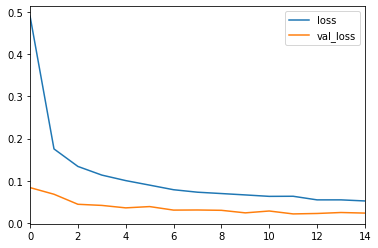

In [35]:
loss.plot()

In [36]:
#prediction = model.predict_classes(test_resize)
#prediction_8 = model.predict_classes(test_eight_resize)
#prediction_8_2 = model.predict_classes(test_eight2)
#prediction_6 = model.predict_classes(test_six_resize)

In [40]:
#prediction_1 = model.predict_classes(test_one_resize)
prediction_8_2 = model.predict_classes(test_eight2)
prediction_2 = model.predict_classes(test_two_resize)
prediction_3 = model.predict_classes(test_three_resize)
#prediction_7 =model.predict_classes(test_seven_resize)

In [41]:
#print("Number 3: {}, number 7: {}, number 2: {}, number 4: {}, number 8: {}".format(prediction_6,prediction, prediction_8, prediction_1, prediction_8_2))
print("Number 2: {},  Number 8: {}, Number 3:  {}".format(prediction_2, prediction_8_2, prediction_3))

Number 2: [2],  Number 8: [8], Number 3:  [3]


In [ ]:
pred = model.predict_classes(x_test1)

In [ ]:
pred

In [ ]:
x_test1[1]

In [ ]:
result = pd.Series(pred,name='Label')

In [ ]:
a = range(1,28001)
submission= pd.DataFrame({
    'ImageId': a,
    'Label': result
})
#submission.set_index('ImageId',inplace=True)
submission.to_csv('submission_cnn.csv',index=False)